In [105]:
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import numpy as np

In [106]:
def plot_correlation_matrix(df, fig_ax=None, absolute=True):
    if fig_ax:
        fig, ax = fig_ax
    else:
        fig, ax = plt.subplots()
        
    corrcoefs = np.corrcoef(df.astype(float).to_numpy().T)
    if absolute:
        corrcoefs = abs(corrcoefs)
        
    mask = np.logical_not(np.tri(corrcoefs.shape[0], k=0))
    corrcoefs = np.ma.array(corrcoefs, mask=mask)
    
    im = ax.imshow(corrcoefs, origin="lower", aspect=0.3, vmin=0 if absolute else -1, vmax=1)
    fig.colorbar(im, ax=ax, label='Interactive Colorbar')

    keys = df.columns.tolist()
    ticks = np.arange(len(keys))
    
    ax.xaxis.tick_top()
    
    ax.set_xticks(ticks, keys, rotation=-45, ha='right')
    ax.set_yticks(ticks, keys)    
    
    ax.set_xticks(ticks-0.5, minor=True)
    ax.set_yticks(ticks-0.5, minor=True)
    
    ax.set_aspect(0.7)
        
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
    
    return fig, ax

In [107]:
tracksummary_gsf = uproot.open("../output_odd/root/tracksummary_gsf.root:tracksummary") \
    .arrays(library="pd") \
    .reset_index() \
    .drop(["entry", "subentry", "subTraj_nr", "measurementChi2", "outlierChi2", "measurementVolume", "outlierVolume", "measurementLayer", "outlierLayer"], axis=1)
tracksummary_gsf.head(3)

,event_nr,multiTraj_nr,nStates,nMeasurements,nOutliers,nHoles,nSharedHits,chi2Sum,NDF,nMajorityHits,...,res_ePHI_fit,res_eTHETA_fit,res_eQOP_fit,res_eT_fit,pull_eLOC0_fit,pull_eLOC1_fit,pull_ePHI_fit,pull_eTHETA_fit,pull_eQOP_fit,pull_eT_fit
0,0,0,28,14,0,1,0,205.890289,24,14,...,-0.000449,-0.000727,-0.001055,-21.347626,1.002550,-2.560428,-0.929525,-1.880983,-0.181958,-0.007121
1,0,1,29,15,0,1,0,160.076431,24,15,...,-0.000324,-0.000174,0.001069,-276.209045,0.821243,-0.024380,-0.783825,-0.435184,0.652385,-0.092133
2,0,2,23,11,0,0,0,124.623215,20,11,...,0.003806,0.000576,0.104481,594.108032,-0.468387,1.008467,1.326095,1.435430,1.735893,0.198173


In [108]:
tracksummary_gsf.shape

(2901, 51)

In [109]:
print(list(tracksummary_gsf.columns))

['event_nr', 'multiTraj_nr', 'nStates', 'nMeasurements', 'nOutliers', 'nHoles', 'nSharedHits', 'chi2Sum', 'NDF', 'nMajorityHits', 'majorityParticleId', 't_charge', 't_time', 't_vx', 't_vy', 't_vz', 't_px', 't_py', 't_pz', 't_theta', 't_phi', 't_eta', 't_p', 't_pT', 't_d0', 't_z0', 'hasFittedParams', 'eLOC0_fit', 'eLOC1_fit', 'ePHI_fit', 'eTHETA_fit', 'eQOP_fit', 'eT_fit', 'err_eLOC0_fit', 'err_eLOC1_fit', 'err_ePHI_fit', 'err_eTHETA_fit', 'err_eQOP_fit', 'err_eT_fit', 'res_eLOC0_fit', 'res_eLOC1_fit', 'res_ePHI_fit', 'res_eTHETA_fit', 'res_eQOP_fit', 'res_eT_fit', 'pull_eLOC0_fit', 'pull_eLOC1_fit', 'pull_ePHI_fit', 'pull_eTHETA_fit', 'pull_eQOP_fit', 'pull_eT_fit']


In [110]:
trackstates_gsf = uproot.open("../output_odd/root/trackstates_gsf.root:trackstates") \
    .arrays(library="pd") \
    .reset_index() \
    .drop(["entry", "subTraj_nr"], axis=1) \
    .rename({'subentry': 'state'}, axis=1)
trackstates_gsf.head(3)

,state,event_nr,multiTraj_nr,t_x,t_y,t_z,t_r,t_dx,t_dy,t_dz,...,pull_eT_smt,g_x_smt,g_y_smt,g_z_smt,px_smt,py_smt,pz_smt,eta_smt,pT_smt,chi2
0,0,0,0,791.042236,-653.436340,87.092812,1026.024780,0.953567,-0.288442,0.086663,...,-0.002753,791.122925,-653.366455,86.242920,0.585243,-0.171516,0.050366,0.082493,0.609858,3.764888
1,1,0,0,783.571167,-651.163513,86.399681,1018.821655,0.952711,-0.290989,0.087558,...,-0.002831,783.604248,-651.134827,85.575081,0.584147,-0.176074,0.050351,0.082435,0.610107,8.305611
2,2,0,0,588.800964,-569.864136,67.779945,819.409424,0.876292,-0.473723,0.087747,...,-0.004578,588.799072,-569.865723,68.123116,0.544397,-0.295674,0.051117,0.082419,0.619509,49.584404


In [111]:
print(list(trackstates_gsf.columns))

['state', 'event_nr', 'multiTraj_nr', 't_x', 't_y', 't_z', 't_r', 't_dx', 't_dy', 't_dz', 't_eLOC0', 't_eLOC1', 't_ePHI', 't_eTHETA', 't_eQOP', 't_eT', 'nStates', 'nMeasurements', 'volume_id', 'layer_id', 'module_id', 'pathLength', 'l_x_hit', 'l_y_hit', 'g_x_hit', 'g_y_hit', 'g_z_hit', 'res_x_hit', 'res_y_hit', 'err_x_hit', 'err_y_hit', 'pull_x_hit', 'pull_y_hit', 'dim_hit', 'nPredicted', 'predicted', 'eLOC0_prt', 'eLOC1_prt', 'ePHI_prt', 'eTHETA_prt', 'eQOP_prt', 'eT_prt', 'res_eLOC0_prt', 'res_eLOC1_prt', 'res_ePHI_prt', 'res_eTHETA_prt', 'res_eQOP_prt', 'res_eT_prt', 'err_eLOC0_prt', 'err_eLOC1_prt', 'err_ePHI_prt', 'err_eTHETA_prt', 'err_eQOP_prt', 'err_eT_prt', 'pull_eLOC0_prt', 'pull_eLOC1_prt', 'pull_ePHI_prt', 'pull_eTHETA_prt', 'pull_eQOP_prt', 'pull_eT_prt', 'g_x_prt', 'g_y_prt', 'g_z_prt', 'px_prt', 'py_prt', 'pz_prt', 'eta_prt', 'pT_prt', 'nFiltered', 'filtered', 'eLOC0_flt', 'eLOC1_flt', 'ePHI_flt', 'eTHETA_flt', 'eQOP_flt', 'eT_flt', 'res_eLOC0_flt', 'res_eLOC1_flt', 'res

In [112]:
def total_energy_loss(df):
    p = 1/abs(df["t_eQOP"].to_numpy())
    return p[0] - p[-1]

tracksummary_gsf["total_energy_loss"] = trackstates_gsf.groupby(["event_nr", "multiTraj_nr"]).apply(total_energy_loss).to_numpy()
tracksummary_gsf["res_eP_fit"] = 1./abs(tracksummary_gsf["eQOP_fit"]) - tracksummary_gsf["t_p"]

(<Figure size 640x480 with 2 Axes>, <AxesSubplot: >)

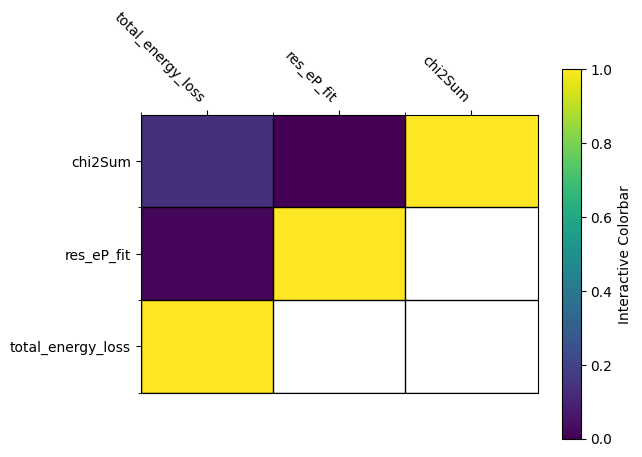

In [113]:
plot_correlation_matrix(tracksummary_gsf[["total_energy_loss", "res_eP_fit", "chi2Sum"]])

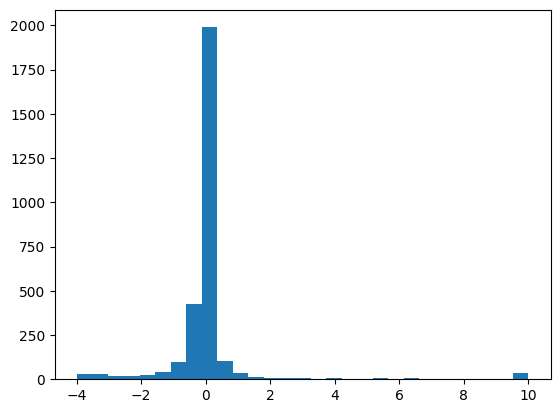

In [114]:
_ = plt.hist(np.clip(tracksummary_gsf["res_eP_fit"], -10, 10), bins="rice")

(<Figure size 1600x1000 with 2 Axes>, <AxesSubplot: >)

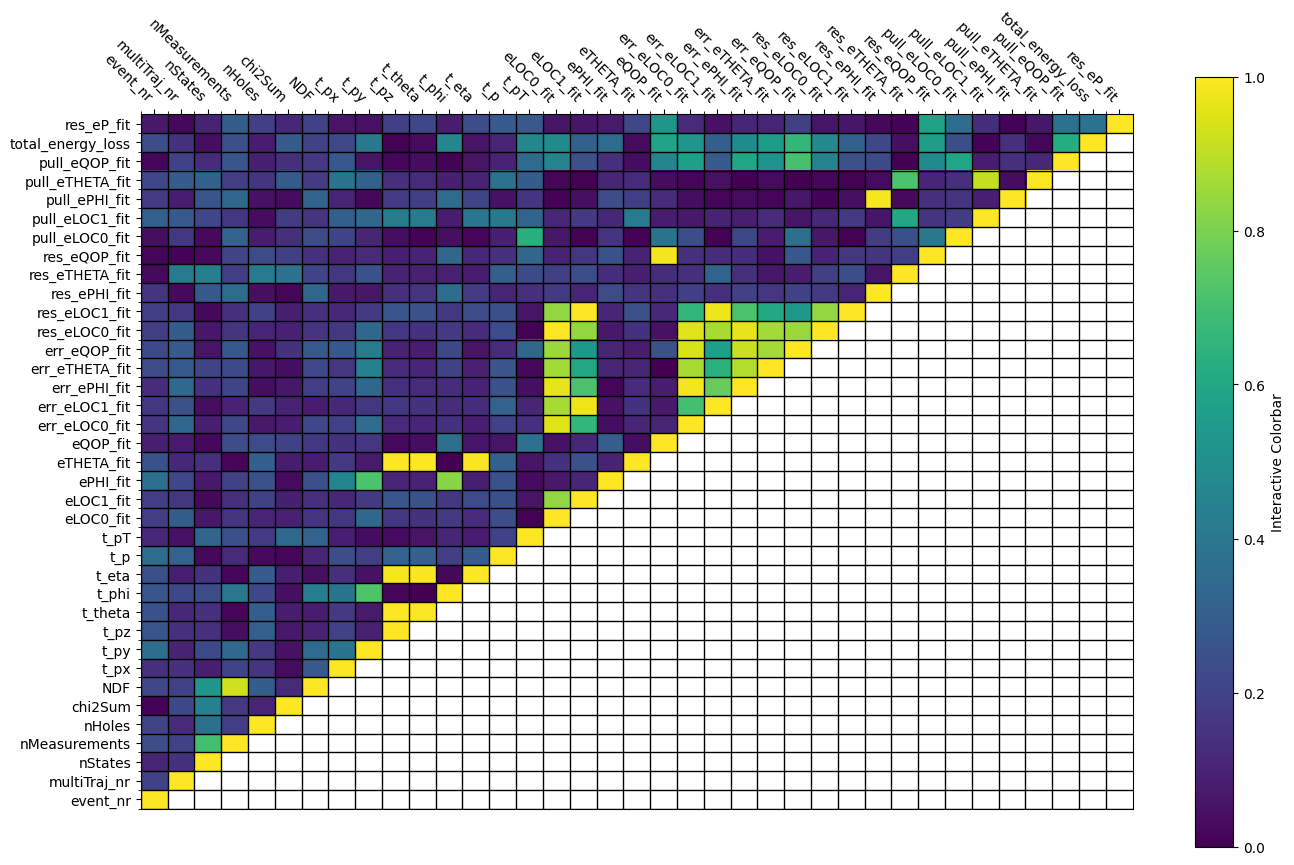

In [119]:
high_res = tracksummary_gsf[ tracksummary_gsf["res_eP_fit"] > 10 ].filter(regex="^(?!.*T_fit).*$", axis=1).filter(regex="^(?!.*t_v).*$", axis=1)
high_res = high_res.drop(["hasFittedParams", "t_time", "t_charge", "t_z0", "t_d0", "nSharedHits", "nOutliers", "majorityParticleId", "nMajorityHits"], axis=1)
plot_correlation_matrix(high_res, plt.subplots(figsize=(16,10)))

<BarContainer object of 4 artists>

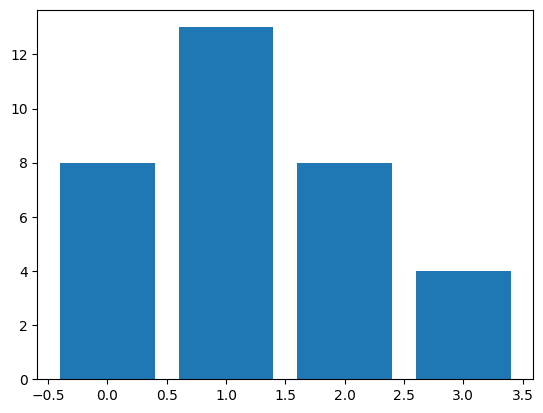

In [116]:
plt.bar(*np.unique(high_res["nHoles"], return_counts=True))